# <font color = 'teal'> Import Libraries </font>

In [1]:
import numpy as np
import math
import pandas as pd
pd.set_option('display.max_columns', 20)
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

# <font color = 'teal'> Read and Inspect Data </font>

In [2]:
source = pd.ExcelFile(r"C:\Users\mcondon\Documents\GitHub\Cohort-analysis\Online Retail.xlsx")

In [3]:
online = pd.read_excel(source, 'Online Retail')

In [4]:
online.head(20)

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12    536367     22749    FELTCRAFT PRINCESS CHARLOTTE DOLL         8   
13    536367     22310              IVORY KNITTED MUG COSY          6   
14    536367     84969   BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
15    536367     22623        BOX OF VINTAGE JIGSAW BLOCKS          3   
16    536367     22622       BOX OF VINTAGE ALPHABET BLOCKS         2   
17    536367     21754             HOME BUILDING BLOCK WORD         3   
18    536367     21755             LOVE BUILDING BLOCK WORD         3   
19    536367     21777          RECIPE BOX WITH METAL HEART         4   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
5  2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
6  2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
7  2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
8  2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
9  2010-12-01 08:34:00       1.69     13047.0  United Kingdom  
10 2010-12-01 08:34:00       2.10     13047.0  United Kingdom  
11 2010-12-01 08:34:00       2.10     13047.0  United Kingdom  
12 2010-12-01 08:34:00       3.75     13047.0  United Kingdom  
13 2010-12-01 08:34:00       1.65     13047.0  United Kingdom  
14 2010-12-01 08:34:00       4.25     13047.0  United Kingdom  
15 2010-12-01 08:34:00       4.95     13047.0  United Kingdom  
16 2010-12-01 08:34:00       9.95     13047.0  United Kingdom  
17 2010-12-01 08:34:00       5.95     13047.0  United Kingdom  
18 2010-12-01 08:34:00       5.95     13047.0  United Kingdom  
19 2010-12-01 08:34:00       7.95     13047.0  United Kingdom

In [5]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
#Dropping nulls
online = online.dropna().reset_index(drop=True)

In [7]:
#Sorting to make it easier to spot check
online = online.sort_values('CustomerID').reset_index(drop=True)

### Assign daily acquisition cohort (CohortDay)##

In [8]:
# Define a function that will parse the date
def get_day(x): 
    return dt.datetime(x.year, x.month, x.day) 

# Create InvoiceDay column
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day) 

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceDay'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortDay'] = grouping.transform('min').astype('datetime64[ns]')

# View the top 5 rows
online.head()

InvoiceNo StockCode                       Description  Quantity  \
0    541431     23166    MEDIUM CERAMIC TOP STORAGE JAR     74215   
1   C541433     23166    MEDIUM CERAMIC TOP STORAGE JAR    -74215   
2    562032     21578  WOODLAND DESIGN  COTTON TOTE BAG         6   
3    542237    47559B               TEA TIME OVEN GLOVE        10   
4    542237     21154         RED RETROSPOT OVEN GLOVE         10   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceDay  \
0 2011-01-18 10:01:00       1.04     12346.0  United Kingdom 2011-01-18   
1 2011-01-18 10:17:00       1.04     12346.0  United Kingdom 2011-01-18   
2 2011-08-02 08:48:00       2.25     12347.0         Iceland 2011-08-02   
3 2011-01-26 14:30:00       1.25     12347.0         Iceland 2011-01-26   
4 2011-01-26 14:30:00       1.25     12347.0         Iceland 2011-01-26   

   CohortDay  
0 2011-01-18  
1 2011-01-18  
2 2010-12-07  
3 2010-12-07  
4 2010-12-07

### Calculate time offset in days - part 1##

In [9]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [10]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

### Calculate time offset in days - part 2 (ChortIndex)

In [11]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1
online.head()

InvoiceNo StockCode                       Description  Quantity  \
0    541431     23166    MEDIUM CERAMIC TOP STORAGE JAR     74215   
1   C541433     23166    MEDIUM CERAMIC TOP STORAGE JAR    -74215   
2    562032     21578  WOODLAND DESIGN  COTTON TOTE BAG         6   
3    542237    47559B               TEA TIME OVEN GLOVE        10   
4    542237     21154         RED RETROSPOT OVEN GLOVE         10   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceDay  \
0 2011-01-18 10:01:00       1.04     12346.0  United Kingdom 2011-01-18   
1 2011-01-18 10:17:00       1.04     12346.0  United Kingdom 2011-01-18   
2 2011-08-02 08:48:00       2.25     12347.0         Iceland 2011-08-02   
3 2011-01-26 14:30:00       1.25     12347.0         Iceland 2011-01-26   
4 2011-01-26 14:30:00       1.25     12347.0         Iceland 2011-01-26   

   CohortDay  CohortIndex  
0 2011-01-18            1  
1 2011-01-18            1  
2 2010-12-07          241  
3 2010-12-07           55  
4 2010-12-07           55

In [12]:
# Converting CohortIndex to months from days
online['CohortIndex'] = np.ceil(np.divide(online.CohortIndex,30)).astype('int')

# <font color = 'teal'> Cohort Metrics </font>

### Calculate retention from scratch

In [13]:
#Adding CohortMonth from CohortDay in dt format
online['CohortMonth'] =  online.CohortDay + pd.offsets.MonthBegin(1)

In [14]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])

In [15]:
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

In [16]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = (cohort_counts.divide(cohort_sizes, axis=0) * 100).round(2)
retention.head()

CohortIndex     1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                  
2011-01-01   100.0  38.29  34.49  38.50  36.29  39.03  37.03  35.44  34.92   
2011-02-01   100.0  24.70  28.98  30.40  30.17  28.98  25.65  27.55  33.73   
2011-03-01   100.0  23.42  23.95  29.47  20.79  26.84  25.53  27.89  28.95   
2011-04-01   100.0  18.64  25.00  23.18  19.55  22.05  24.32  27.05  21.82   
2011-05-01   100.0  27.42  17.73  22.41  18.39  23.75  24.75  22.74   2.34   

CohortIndex     10     11     12     13  
CohortMonth                              
2011-01-01   38.29  40.61  50.74  19.73  
2011-02-01   35.15  28.50   1.43    NaN  
2011-03-01   25.00   0.79    NaN    NaN  
2011-04-01    2.50    NaN    NaN    NaN  
2011-05-01     NaN    NaN    NaN    NaN

### Calculate average price

In [17]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
average_price = average_price.round(2)
average_price.head()

CohortIndex    1     2     3     4     5     6     7     8     9     10    11  \
CohortMonth                                                                     
2011-01-01   3.20  3.19  3.23  3.57  2.90  4.99  3.15  3.25  3.45  3.08  3.21   
2011-02-01   3.50  3.38  7.34  3.12  3.33  2.88  2.77  2.72  5.63  3.00  2.77   
2011-03-01   3.52  4.78  2.94  3.14  2.97  2.72  3.19  3.00  2.89  3.06  2.54   
2011-04-01   3.49  3.86  3.32  3.53  3.08  2.79  2.77  2.79  2.66  3.15   NaN   
2011-05-01   3.42  3.82  3.16  2.86  2.88  2.88  2.72  2.91  2.54   NaN   NaN   

CohortIndex    12    13  
CohortMonth              
2011-01-01   2.85  2.81  
2011-02-01   2.36   NaN  
2011-03-01    NaN   NaN  
2011-04-01    NaN   NaN  
2011-05-01    NaN   NaN

### Calculate average quantity

In [18]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = online.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['Quantity'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
average_quantity = average_quantity.round(1)
average_quantity.head()

CohortIndex    1     2     3     4     5     6     7     8     9     10    11  \
CohortMonth                                                                     
2011-01-01   11.3  14.5  14.1  15.0  14.6  13.3  14.4  17.5  14.8  17.2  16.9   
2011-02-01    9.8  15.2  11.3  10.7  12.7  15.4  14.2  14.0  11.4   8.5   9.2   
2011-03-01   10.8  13.9  16.1  11.8  10.4  13.2  13.0  11.2  10.0  13.8  18.8   
2011-04-01    9.7  11.0  11.8   9.9  13.8  13.9  10.8  13.7   9.3   5.7   NaN   
2011-05-01    9.8   8.7  11.8  11.3  11.1   8.6   9.3   9.5   5.6   NaN   NaN   

CohortIndex    12    13  
CohortMonth              
2011-01-01   13.0  13.1  
2011-02-01   12.2   NaN  
2011-03-01    NaN   NaN  
2011-04-01    NaN   NaN  
2011-05-01    NaN   NaN

# <font color = 'teal'>Cohot Analysis Visualization</font>

No handles with labels found to put in legend.


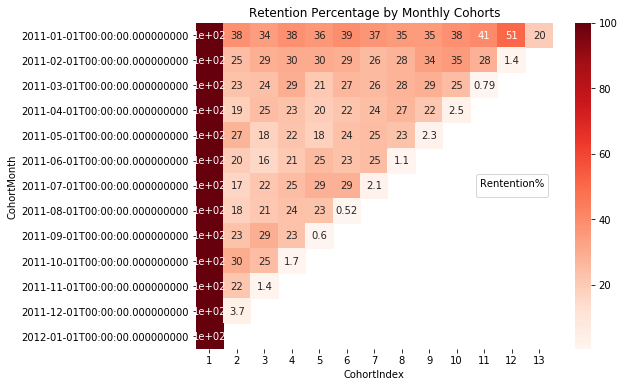

In [19]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Retention Percentage by Monthly Cohorts')

# Create the heatmap
ax = sns.heatmap(data = retention, annot=True, cmap='Reds')
plt.yticks(rotation = 0)
ax.legend(loc = 'right' , title = "Rentention%")
plt.show()

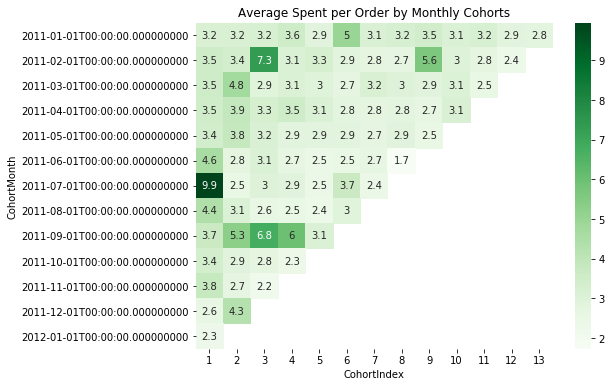

In [24]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Spent per Order by Monthly Cohorts')

# Create the heatmap
ax = sns.heatmap(data = average_price, annot=True, cmap='Greens')
plt.yticks(rotation = 0)
plt.show()

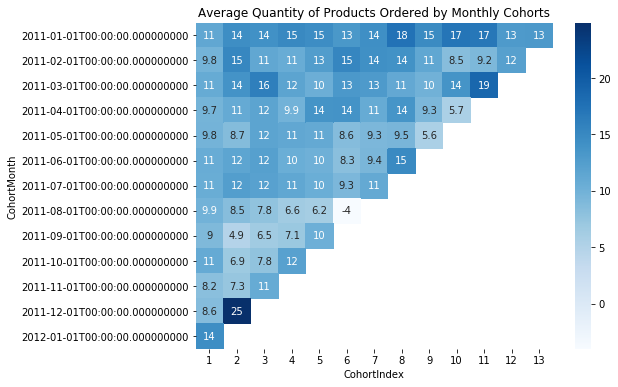

In [23]:
# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(8, 6))

# Add a title
plt.title('Average Quantity of Products Ordered by Monthly Cohorts')

# Create the heatmap
ax = sns.heatmap(data = average_quantity, annot=True, cmap='Blues')
plt.yticks(rotation = 0)
plt.show()

# <font color = 'teal'>RFM Sementation Recency Frequency Monetary</font>
https://en.wikipedia.org/wiki/RFM_(market_research)
- Recency - days since last customer transaction
- Frequecy - number of transaction in the last 12 months
- Monetary Value - total spend in last 12 months

**Can group by:**
  - Percentiles (chosen for this project)
  > 1. Sort customers based on percentile
  > 2. Break customers into a pre-defined number of groups of equal size
  > 3. Assign a label to each group
  - Pareto 80/20 cut
  - Custom, based on business knowledge


### Adjusting data to only last 12 months of invoices

In [27]:
print('Min invoice date:{}; Max invoice data:{}'.format(min(online.InvoiceDate), max(online.InvoiceDate)))

Min invoice date:2010-12-01 08:26:00; Max invoice data:2011-12-09 12:50:00


In [29]:
#Data is already adjusted to last 12 months 
#Data is old, so creating hypothetical snap_shot data as if we're doing analysis recently
snapshot_date = max(online.InvoiceDate) + dt.timedelta(days=1)

### Calculate RFM Metrics

In [74]:
# Aggregate data on a customer level

In [135]:
rfm = online.groupby('CustomerID')
rfm = rfm.agg(Recency = ('InvoiceDate','max'),
            Frequency = ('InvoiceNo','size'),
           Monetary_Value = ('UnitPrice', 'sum'))

In [127]:
day_diff = snapshot_date - rfm.Recency

In [128]:
recency_days = []
for x in rfm.Recency:
    diff = snapshot_date-x
    diff = diff/np.timedelta64(1,"D")
    diff = np.ceil(diff).astype('int')
    recency_days.append(diff)

In [136]:
rfm['Recency'] = recency_days

In [138]:
rfm.index = rfm.index.astype('int')
rfm.index.name='CustomerID'
rfm

Recency  Frequency  Monetary_Value
CustomerID                                    
12346           327          2            2.08
12347             3        182          481.21
12348            76         31          178.71
12349            20         73          605.10
12350           311         17           65.30
...             ...        ...             ...
18280           279         10           47.65
18281           182          7           39.36
18282             9         13           62.68
18283             5        756         1220.93
18287            44         70          104.55

[4372 rows x 3 columns]

In [226]:
rfm = rfm[rfm.Monetary_Value != 0]

### Building RFM segments

In [227]:
# Generator of labels for recency where 4 is best and 1 is worst
r_labels = range(4,0,-1)

# Recency quartiles
r_quartiles = pd.qcut(rfm.Recency,4,labels=r_labels)

# Append recency quartiles to dataframe
rfm['R'] = r_quartiles

C:\Users\mcondon\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [228]:
# Generator of labels for frequency and monetary where 1 is best and 4 is worst
f_labels = range(1,5)
m_labels = range(1,5)

# frequency and monetary quartiles
f_quartiles = pd.qcut(rfm.Frequency,4,labels=f_labels)
m_quartiles = pd.qcut(rfm.Monetary_Value,4,labels=m_labels)

# Append recency quartiles to dataframe
rfm['F'] = f_quartiles
rfm['M'] = m_quartiles
rfm

C:\Users\mcondon\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\mcondon\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Recency  Frequency  Monetary_Value  R  F  M Segment  Score  \
CustomerID                                                               
12346           327          2            2.08  1  1  1     111      3   
12347             3        182          481.21  4  4  4     444     12   
12348            76         31          178.71  2  2  3     223      7   
12349            20         73          605.10  3  3  4     334     10   
12350           311         17           65.30  1  1  2     112      4   
...             ...        ...             ... .. .. ..     ...    ...   
18280           279         10           47.65  1  1  1     111      3   
18281           182          7           39.36  1  1  1     111      3   
18282             9         13           62.68  4  1  2     412      7   
18283             5        756         1220.93  4  4  4     444     12   
18287            44         70          104.55  3  3  2     332      8   

           General_Segment  
CustomerID                  
12346               Bronze  
12347                 Gold  
12348               Silver  
12349                 Gold  
12350               Bronze  
...                    ...  
18280               Bronze  
18281               Bronze  
18282               Silver  
18283                 Gold  
18287               Silver  

[4371 rows x 9 columns]

In [229]:
# Creating RFM segement
def join_rfm(x):
    return str(x.R) + str(x.F) + str(x.M)

rfm['Segment'] = rfm.apply(join_rfm,axis=1)
rfm

C:\Users\mcondon\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Recency  Frequency  Monetary_Value  R  F  M Segment  Score  \
CustomerID                                                               
12346           327          2            2.08  1  1  1     111      3   
12347             3        182          481.21  4  4  4     444     12   
12348            76         31          178.71  2  2  3     223      7   
12349            20         73          605.10  3  3  4     334     10   
12350           311         17           65.30  1  1  2     112      4   
...             ...        ...             ... .. .. ..     ...    ...   
18280           279         10           47.65  1  1  1     111      3   
18281           182          7           39.36  1  1  1     111      3   
18282             9         13           62.68  4  1  2     412      7   
18283             5        756         1220.93  4  4  4     444     12   
18287            44         70          104.55  3  3  2     332      8   

           General_Segment  
CustomerID                  
12346               Bronze  
12347                 Gold  
12348               Silver  
12349                 Gold  
12350               Bronze  
...                    ...  
18280               Bronze  
18281               Bronze  
18282               Silver  
18283                 Gold  
18287               Silver  

[4371 rows x 9 columns]

In [230]:
rfm['Score'] = rfm[['R','F','M']].sum(axis=1).astype('int')
rfm

C:\Users\mcondon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Recency  Frequency  Monetary_Value  R  F  M Segment  Score  \
CustomerID                                                               
12346           327          2            2.08  1  1  1     111      3   
12347             3        182          481.21  4  4  4     444     12   
12348            76         31          178.71  2  2  3     223      7   
12349            20         73          605.10  3  3  4     334     10   
12350           311         17           65.30  1  1  2     112      4   
...             ...        ...             ... .. .. ..     ...    ...   
18280           279         10           47.65  1  1  1     111      3   
18281           182          7           39.36  1  1  1     111      3   
18282             9         13           62.68  4  1  2     412      7   
18283             5        756         1220.93  4  4  4     444     12   
18287            44         70          104.55  3  3  2     332      8   

           General_Segment  
CustomerID                  
12346               Bronze  
12347                 Gold  
12348               Silver  
12349                 Gold  
12350               Bronze  
...                    ...  
18280               Bronze  
18281               Bronze  
18282               Silver  
18283                 Gold  
18287               Silver  

[4371 rows x 9 columns]

### Analyzinf RFM Segments

In [231]:
# Calculate size of segments
rfm.groupby('Segment').size().sort_values(ascending=False)[:10]

Segment
444    505
111    414
344    266
211    254
122    235
222    217
333    214
233    202
433    199
322    150
dtype: int64

In [232]:
# Select bottom RFM segment '111' and view top 5
rfm[rfm.Segment == '111'][:5]

Recency  Frequency  Monetary_Value  R  F  M Segment  Score  \
CustomerID                                                               
12346           327          2            2.08  1  1  1     111      3   
12353           205          4           24.30  1  1  1     111      3   
12361           288         10           33.35  1  1  1     111      3   
12386           339         10           23.91  1  1  1     111      3   
12401           304          5           48.40  1  1  1     111      3   

           General_Segment  
CustomerID                  
12346               Bronze  
12353               Bronze  
12361               Bronze  
12386               Bronze  
12401               Bronze

In [233]:
# Summary metrics for RFM Score
rfm.groupby('Score').agg(Recency_avg = ('Recency','mean'),
                         Frequency_avg = ('Frequency','mean'), 
                         Monetary_avg =('Monetary_Value','mean'))

Recency_avg  Frequency_avg  Monetary_avg
Score                                          
3       263.176329       7.442029     22.772488
4       145.153266      11.776382     37.017286
5       153.971602      19.590264     64.008765
6        95.773389      25.187110    183.321580
7        96.874715      41.157175    136.997246
8        61.713978      54.348387    182.394475
9        50.826425      80.968912    253.641117
10       33.813107     108.075243    400.433325
11       24.693122     195.044974    652.317698
12        7.839604     365.225743   1206.950416

In [234]:
# Review distiburion of RFM Score
rfm.Score.describe()

count    4371.000000
mean        7.501716
std         2.868145
min         3.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: Score, dtype: float64

In [235]:
# function for grouping into named segemnts by RFM Score
def segment_me(df):
    if df['Score'] >= 10:
        return 'Gold'
    elif df['Score'] >=6 and (df['Score'] < 10):
        return 'Silver'
    else:
        return 'Bronze'

In [236]:
rfm['General_Segment'] = rfm.apply(segment_me, axis=1)
rfm

C:\Users\mcondon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Recency  Frequency  Monetary_Value  R  F  M Segment  Score  \
CustomerID                                                               
12346           327          2            2.08  1  1  1     111      3   
12347             3        182          481.21  4  4  4     444     12   
12348            76         31          178.71  2  2  3     223      7   
12349            20         73          605.10  3  3  4     334     10   
12350           311         17           65.30  1  1  2     112      4   
...             ...        ...             ... .. .. ..     ...    ...   
18280           279         10           47.65  1  1  1     111      3   
18281           182          7           39.36  1  1  1     111      3   
18282             9         13           62.68  4  1  2     412      7   
18283             5        756         1220.93  4  4  4     444     12   
18287            44         70          104.55  3  3  2     332      8   

           General_Segment  
CustomerID                  
12346               Bronze  
12347                 Gold  
12348               Silver  
12349                 Gold  
12350               Bronze  
...                    ...  
18280               Bronze  
18281               Bronze  
18282               Silver  
18283                 Gold  
18287               Silver  

[4371 rows x 9 columns]

In [237]:
segments = rfm.groupby('General_Segment').agg(Size = ('General_Segment','count'),
                                   Recency_avg = ('Recency','mean'), 
                                   Frequency_avg = ('Frequency','mean'), 
                                   Monetary_avg = ('Monetary_Value', 'mean')).round(1).reindex(['Gold', 'Silver', 'Bronze'])
segments

Size  Recency_avg  Frequency_avg  Monetary_avg
General_Segment                                                
Gold             1295         21.0          233.7         788.5
Silver           1771         77.3           49.0         186.9
Bronze           1305        185.9           13.4          42.7

In [238]:
segments['Share_Percent'] = (segments.Size/np.sum(segments.Size)*100).round(2)

In [239]:
segments = segments[['Size', 'Share_Percent', 'Recency_avg', 'Frequency_avg', 'Monetary_avg' ]]
segments

Size  Share_Percent  Recency_avg  Frequency_avg  Monetary_avg
General_Segment                                                               
Gold             1295          29.63         21.0          233.7         788.5
Silver           1771          40.52         77.3           49.0         186.9
Bronze           1305          29.86        185.9           13.4          42.7

# <font color='teal'> Data Pre-Processing for k-means Clustering for Unsupervised Learning</font>

### Assumptions about data for k-means##
<br>
 1. Symetric distribution of variables (not skewed)<br>
 2. All variables have same average values to get equal weight in k-means calculation<br>
 3. All variables have the same variance 

### 1. Managing skewed variables

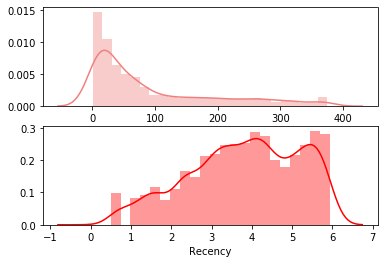

In [280]:
plt.subplot(2,1,1);sns.distplot(rfm.Recency, color = 'lightcoral')

recency_log = np.log(rfm.Recency)
plt.subplot(2,1,2);sns.distplot(recency_log, color='red')
plt.show()

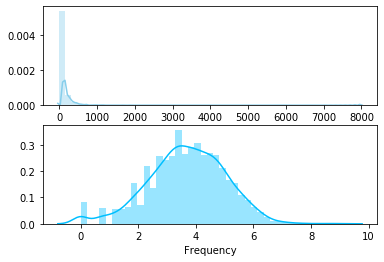

In [281]:
plt.subplot(2,1,1);sns.distplot(rfm.Frequency, color = 'skyblue')

frequency_log = np.log(rfm.Frequency)
plt.subplot(2,1,2); sns.distplot(frequency_log, color='deepskyblue')
plt.show()

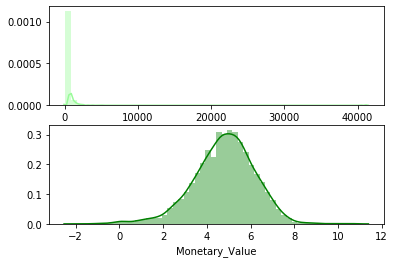

In [282]:
plt.subplot(2,1,1);sns.distplot(rfm.Monetary_Value, color='palegreen')

monetary_log = np.log(rfm.Monetary_Value).round(2)
plt.subplot(2,1,2); sns.distplot(monetary_log, color='green')
plt.show()

### 2. Centering and scalling variables